Nome: Felipe Bortolletto
Professor: Prof. Anderson Ara
Disciplina: TEORIA DO APRENDIZADO ESTAT ́ISTICO
Data: 26 de abril de 2024


#Enunciado da Atividade

Para o conjunto de dados Rice, faça a predição da variável Class utilizando classificadores SVM e de Redes Neurais. Utilize métodos de validação e medição de desempenho cabíveis. Crie um relatorio de até 5 páginas sobre a comparação dos classificadores.


Iniciaremos importando os dados e criando familiaridade com eles

In [11]:
!pip install ucimlrepo

In [12]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
rice_cammeo_and_osmancik = fetch_ucirepo(id=545)

# data (as pandas dataframes)
X = rice_cammeo_and_osmancik.data.features
y = rice_cammeo_and_osmancik.data.targets

X.shape,y.shape


((3810, 7), (3810, 1))

In [13]:
y['Class'].replace({'Cammeo': 0, 'Osmancik': 1},inplace = True)
y

<ipython-input-13-ee9f0d4414e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Class'].replace({'Cammeo': 0, 'Osmancik': 1},inplace = True)


,Class
0,0
1,0
2,0
3,0
4,0
...,...
3805,1
3806,1
3807,1
3808,1


No comando acima substituimos os nomes das classe, agora as classes se tornão  

Cammeo: 0

Osmancik: 1

Alem disso abaixo iremos normalizar os dados

In [14]:
# Importamos as metodologias


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # Função para normalização

#Modelo SVM e a biblioteca metrics para calculo da acuracia.
from sklearn import svm
from sklearn import metrics

import numpy as np





## Aplicação Kernel rbf k-fold validação cruzada


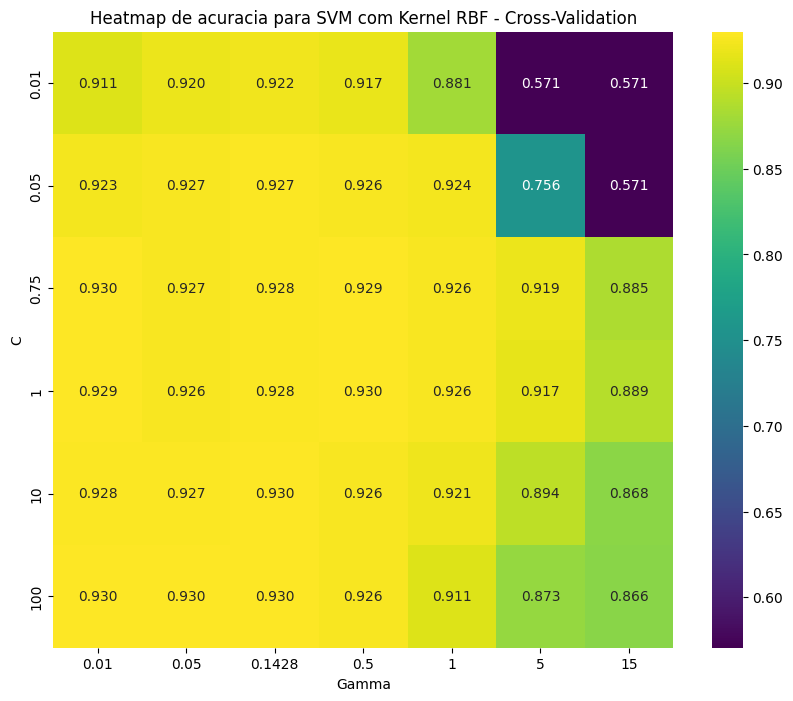

In [15]:

# Definir os parâmetros de C e gamma
C_values = [0.01, 0.05, 0.75, 1, 10, 100]
gamma_values = [0.01, 0.05, 0.1428, 0.5, 1, 5, 15]

# Criar uma matriz para armazenar as médias das acurácias
accuracy_matrix = np.zeros((len(C_values), len(gamma_values)))

# Configurar k-fold cross-validation
k = 5
rs = ShuffleSplit(n_splits=k, test_size=0.2, random_state=0)

# Normalizador
scaler = StandardScaler()

# Treinar o modelo para cada combinação de C e gamma e armazenar a média das acurácias
for i, C in enumerate(C_values):
    for j, g in enumerate(gamma_values):
        acc_scores = []
        for o, (train_index, test_index) in enumerate(rs.split(X)):

            X_train , X_test = X.values[train_index],X.values[test_index]
            y_train , y_test = y.values[train_index].flatten() , y.values[test_index].flatten()

            # Normalizar os dados
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)

            # Treinar o modelo
            model = svm.SVC(C=C, kernel='rbf', gamma=g)
            model.fit(X_train, y_train)

            # Fazer previsões e calcular a acurácia
            preds = model.predict(X_test)
            acc = metrics.accuracy_score(preds, y_test)
            acc_scores.append(acc)


        # Calcular a média das acurácias
        avg_acc_score = np.mean(acc_scores)
        # print(avg_acc_score)
        accuracy_matrix[i, j] = avg_acc_score

# Plotar o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(accuracy_matrix, annot=True, xticklabels=gamma_values, yticklabels=C_values, cmap="viridis",fmt=".3f")
plt.xlabel("Gamma")
plt.ylabel("C")
plt.title("Heatmap de acuracia para SVM com Kernel RBF - Cross-Validation")
plt.savefig("RBF.png", dpi=300)

# Exibir o plot
plt.show()


## Aplicação Kernel linear k-fold validação cruzada

0.930971128608924
0.930971128608924
0.930971128608924
0.930971128608924
0.930971128608924
0.930971128608924
0.930971128608924
0.930708661417323
0.930708661417323
0.930708661417323
0.930708661417323
0.930708661417323
0.930708661417323
0.930708661417323
0.9312335958005249
0.9312335958005249
0.9312335958005249
0.9312335958005249
0.9312335958005249
0.9312335958005249
0.9312335958005249
0.9312335958005249
0.9312335958005249
0.9312335958005249
0.9312335958005249
0.9312335958005249
0.9312335958005249
0.9312335958005249
0.9288713910761155
0.9288713910761155
0.9288713910761155
0.9288713910761155
0.9288713910761155
0.9288713910761155
0.9288713910761155
0.9286089238845145
0.9286089238845145
0.9286089238845145
0.9286089238845145
0.9286089238845145
0.9286089238845145
0.9286089238845145


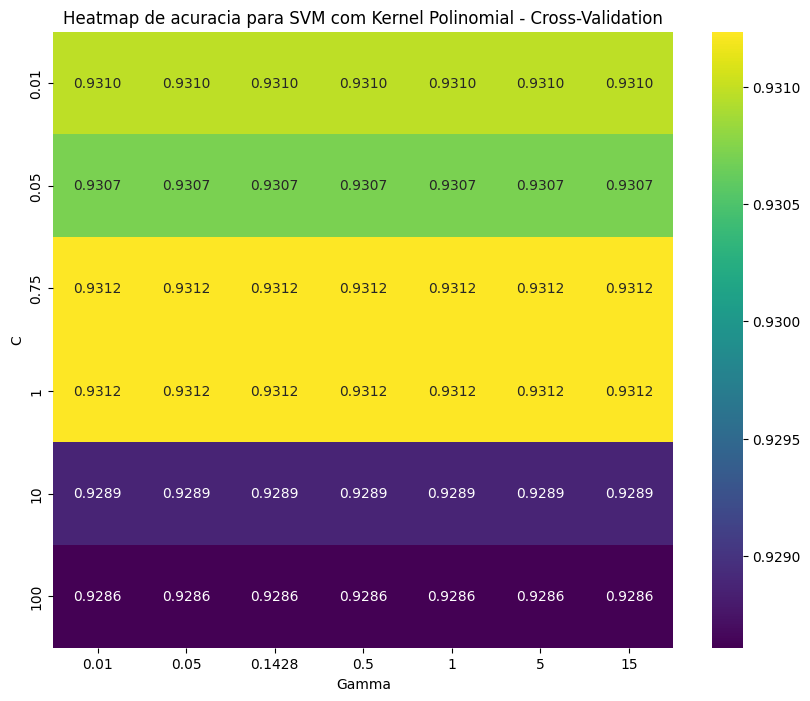

In [16]:
# Definir os parâmetros de C e gamma
C_values = [0.01, 0.05, 0.75, 1, 10, 100]
gamma_values = [0.01, 0.05, 0.1428, 0.5, 1, 5, 15]

# Criar uma matriz para armazenar as médias das acurácias
accuracy_matrix = np.zeros((len(C_values), len(gamma_values)))

# Configurar k-fold cross-validation
k = 5
rs = ShuffleSplit(n_splits=k, test_size=0.2, random_state=0)

# Normalizador
scaler = StandardScaler()

# Treinar o modelo para cada combinação de C e gamma e armazenar a média das acurácias
for i, C in enumerate(C_values):
    for j, g in enumerate(gamma_values):
        acc_scores = []
        for o, (train_index, test_index) in enumerate(rs.split(X)):

            X_train , X_test = X.values[train_index],X.values[test_index]
            y_train , y_test = y.values[train_index].flatten() , y.values[test_index].flatten()

            # Normalizar os dados
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)

            # Treinar o modelo
            model = svm.SVC(C=C, kernel='linear', gamma=g)
            model.fit(X_train, y_train)

            # Fazer previsões e calcular a acurácia
            preds = model.predict(X_test)
            acc = metrics.accuracy_score(preds, y_test)
            acc_scores.append(acc)


        # Calcular a média das acurácias
        avg_acc_score = np.mean(acc_scores)
        print(avg_acc_score)
        accuracy_matrix[i, j] = avg_acc_score

# Plotar o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(accuracy_matrix, annot=True, xticklabels=gamma_values, yticklabels=C_values, cmap="viridis",fmt=".4f")
plt.xlabel("Gamma")
plt.ylabel("C")
plt.title("Heatmap de acuracia para SVM com Kernel Polinomial - Cross-Validation")
plt.savefig("linear.png", dpi=300)
plt.show()

## Aplicação Kernel sigmoid k-fold validação cruzada

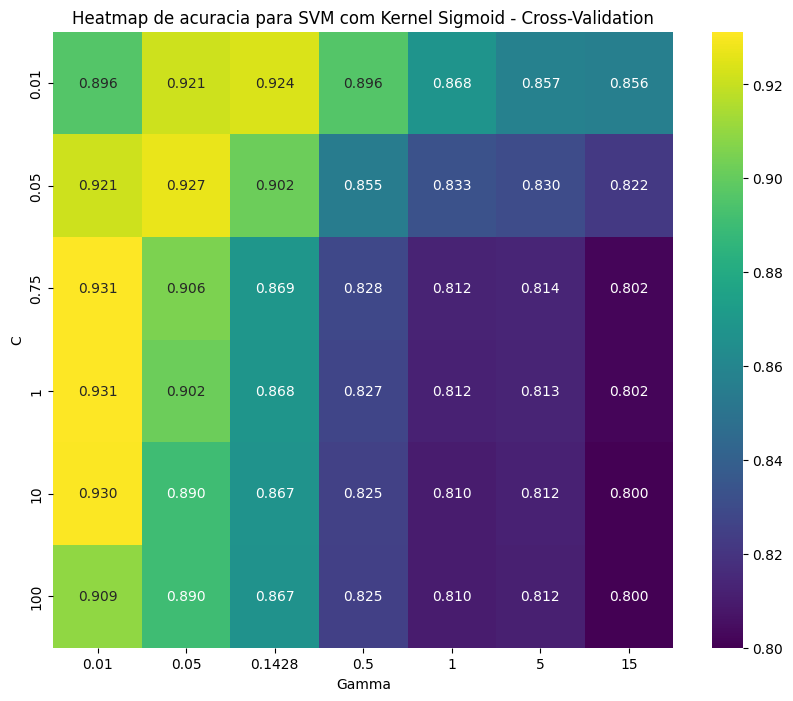

In [17]:
# Definir os parâmetros de C e gamma
C_values = [0.01, 0.05, 0.75, 1, 10, 100]
gamma_values = [0.01, 0.05, 0.1428, 0.5, 1, 5, 15]

# Criar uma matriz para armazenar as médias das acurácias
accuracy_matrix = np.zeros((len(C_values), len(gamma_values)))

# Configurar k-fold cross-validation
k = 5
rs = ShuffleSplit(n_splits=k, test_size=0.2, random_state=0)

# Normalizador
scaler = StandardScaler()

# Treinar o modelo para cada combinação de C e gamma e armazenar a média das acurácias
for i, C in enumerate(C_values):
    for j, g in enumerate(gamma_values):
        acc_scores = []
        for o, (train_index, test_index) in enumerate(rs.split(X)):

            X_train , X_test = X.values[train_index],X.values[test_index]
            y_train , y_test = y.values[train_index].flatten() , y.values[test_index].flatten()

            # Normalizar os dados
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)

            # Treinar o modelo
            model = svm.SVC(C=C, kernel='sigmoid', gamma=g)
            model.fit(X_train, y_train)

            # Fazer previsões e calcular a acurácia
            preds = model.predict(X_test)
            acc = metrics.accuracy_score(preds, y_test)
            acc_scores.append(acc)


        # Calcular a média das acurácias
        avg_acc_score = np.mean(acc_scores)
        # print(avg_acc_score)
        accuracy_matrix[i, j] = avg_acc_score

# Plotar o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(accuracy_matrix, annot=True, xticklabels=gamma_values, yticklabels=C_values, cmap="viridis",fmt=".3f")
plt.xlabel("Gamma")
plt.ylabel("C")
plt.title("Heatmap de acuracia para SVM com Kernel Sigmoid - Cross-Validation")
plt.savefig("sigmoid.png", dpi=300)
plt.show()

### Aplicação MLP -PERCEPTRON SKT - LEARN

In [18]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(random_state=42, max_iter=300,hidden_layer_sizes=(100,),activation = "relu",solver = "adam",learning_rate_init=0.001).fit(X_train, y_train)
model.predict_proba(X_test[:1])
model.predict(X_test)
model.score(X_test, y_test)

0.9278215223097113

In [19]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Definir os valores dos parâmetros que você deseja testar
max_iter_values = [200,300,400]
hidden_layer_sizes_values = [(16,),(50,), (100,), (150,)]
activation_values = ['logistic', 'relu',"identity","tanh"]

learning_rate_init_values = [0.001, 0.01, 0.1]

# Criar uma lista para armazenar as médias das pontuações de validação cruzada
mean_scores = []

# Loop sobre todas as combinações de parâmetros
for max_iter in max_iter_values:
    for hidden_layer_sizes in hidden_layer_sizes_values:
        for activation in activation_values:
            for learning_rate_init in learning_rate_init_values:
                # Criar o modelo com os parâmetros atuais
                model = MLPClassifier(random_state=42, max_iter=max_iter,
                                      hidden_layer_sizes=hidden_layer_sizes,
                                      activation=activation, solver='adam',
                                      learning_rate_init=learning_rate_init)
                # Realizar a validação cruzada
                scores = cross_val_score(model, X_train, y_train, cv=5)
                # Calcular a média das pontuações
                mean_score = np.mean(scores)
                # Armazenar a média das pontuações
                mean_scores.append((mean_score, max_iter, hidden_layer_sizes, activation, learning_rate_init))

# Ordenar as médias das pontuações
mean_scores.sort(reverse=True)

# Exibir as 10 melhores combinações de parâmetros com as respectivas médias das pontuações
for i in range(10):
    print("Mean Score:", mean_scores[i][0])
    print("max_iter:", mean_scores[i][1])
    print("hidden_layer_sizes:", mean_scores[i][2])
    print("activation:", mean_scores[i][3])
    print("learning_rate_init:", mean_scores[i][4])
    print()

Mean Score: 0.9317585937710302
max_iter: 400
hidden_layer_sizes: (50,)
activation: tanh
learning_rate_init: 0.01

Mean Score: 0.9317585937710302
max_iter: 300
hidden_layer_sizes: (50,)
activation: tanh
learning_rate_init: 0.01

Mean Score: 0.9317585937710302
max_iter: 200
hidden_layer_sizes: (50,)
activation: tanh
learning_rate_init: 0.01

Mean Score: 0.9307722953511532
max_iter: 400
hidden_layer_sizes: (150,)
activation: relu
learning_rate_init: 0.01

Mean Score: 0.9307722953511532
max_iter: 300
hidden_layer_sizes: (150,)
activation: relu
learning_rate_init: 0.01

Mean Score: 0.9307722953511532
max_iter: 200
hidden_layer_sizes: (150,)
activation: relu
learning_rate_init: 0.01

Mean Score: 0.9304471183611941
max_iter: 400
hidden_layer_sizes: (150,)
activation: tanh
learning_rate_init: 0.01

Mean Score: 0.9304471183611941
max_iter: 300
hidden_layer_sizes: (150,)
activation: tanh
learning_rate_init: 0.01

Mean Score: 0.9304471183611941
max_iter: 200
hidden_layer_sizes: (150,)
activation:

In [20]:
mean_scores

[(0.9317585937710302, 400, (50,), 'tanh', 0.01),
 (0.9317585937710302, 300, (50,), 'tanh', 0.01),
 (0.9317585937710302, 200, (50,), 'tanh', 0.01),
 (0.9307722953511532, 400, (150,), 'relu', 0.01),
 (0.9307722953511532, 300, (150,), 'relu', 0.01),
 (0.9307722953511532, 200, (150,), 'relu', 0.01),
 (0.9304471183611941, 400, (150,), 'tanh', 0.01),
 (0.9304471183611941, 300, (150,), 'tanh', 0.01),
 (0.9304471183611941, 200, (150,), 'tanh', 0.01),
 (0.9301187111362351, 400, (16,), 'identity', 0.1),
 (0.9301187111362351, 300, (16,), 'identity', 0.1),
 (0.9301187111362351, 200, (16,), 'identity', 0.1),
 (0.9301170960187353, 400, (100,), 'relu', 0.001),
 (0.9301170960187353, 300, (100,), 'relu', 0.001),
 (0.9301170960187353, 200, (100,), 'relu', 0.001),
 (0.9297903039112763, 400, (150,), 'relu', 0.1),
 (0.9297903039112763, 300, (150,), 'relu', 0.1),
 (0.9297903039112763, 200, (150,), 'relu', 0.1),
 (0.9294608199413175, 400, (100,), 'tanh', 0.01),
 (0.9294608199413175, 300, (100,), 'tanh', 0.01

In [21]:
import pandas as pd

df = pd.read_csv("mlp.txt")
df

,acc,epocas,hiden_l,funcao,lr
0,0.929131,400,100,relu,0.001
1,0.929131,300,100,relu,0.001
2,0.929131,200,100,relu,0.001
3,0.928476,400,50,relu,0.001
4,0.928476,300,50,relu,0.001
5,0.928476,200,50,relu,0.001
6,0.927492,400,50,identity,0.100
7,0.927492,300,50,identity,0.100
8,0.927492,200,50,identity,0.100
9,0.927491,400,50,identity,0.010


In [22]:
relu = df.loc[df.funcao == "relu"]
identity = df.loc[df.funcao == "identity"]
logistic = df.loc[df.funcao == "logistic"]
tanh = df.loc[df.funcao == "tanh"]

In [23]:
df.groupby('lr')['acc'].mean()

# A melhor taxa de aprendizado foi de 0.001
# O numero de hiden layers com melhor desempenho médio foi de 50.

lr
0.001    0.927389
0.010    0.926835
0.100    0.926572
Name: acc, dtype: float64

In [24]:
df.acc.mean()

0.9269224609006971